# Visualizing Painter By Numbers

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

## Samples in the Set

In [4]:
dataset_dir = '/home/ldavid/workspace/datasets/painter-by-numbers/meta/'

pbn_train = pd.read_csv(os.path.join(dataset_dir, 'train_info.csv'))
pbn_train.head()

,filename,artist,title,style,genre,date
0,102257.jpg,5b39c876740bfc1cfaf544721c43cac3,Uriel,Color Field Painting,abstract,1955.0
1,75232.jpg,5b39c876740bfc1cfaf544721c43cac3,Vir Heroicus Sublimis,Color Field Painting,abstract,1950.0
2,29855.jpg,96e5bc98488ed589b9bf17ad9fd09371,Night March of a Hundred Demons (left half),Yamato-e,mythological painting,NaN
3,62252.jpg,5b39c876740bfc1cfaf544721c43cac3,"Who’s Afraid of Red, Yellow and Blue II",Color Field Painting,abstract,NaN
4,63861.jpg,5b39c876740bfc1cfaf544721c43cac3,Black Fire I,Color Field Painting,abstract,1963.0


In [5]:
pbn = pd.read_csv(os.path.join(dataset_dir, 'all_data_info.csv'))
pbn.head()

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


## Counting Samples in Each Group

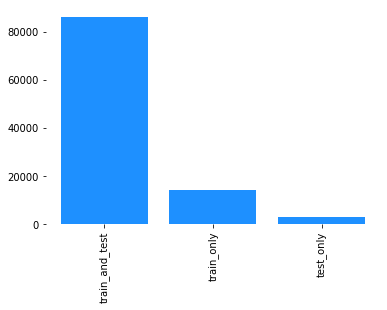

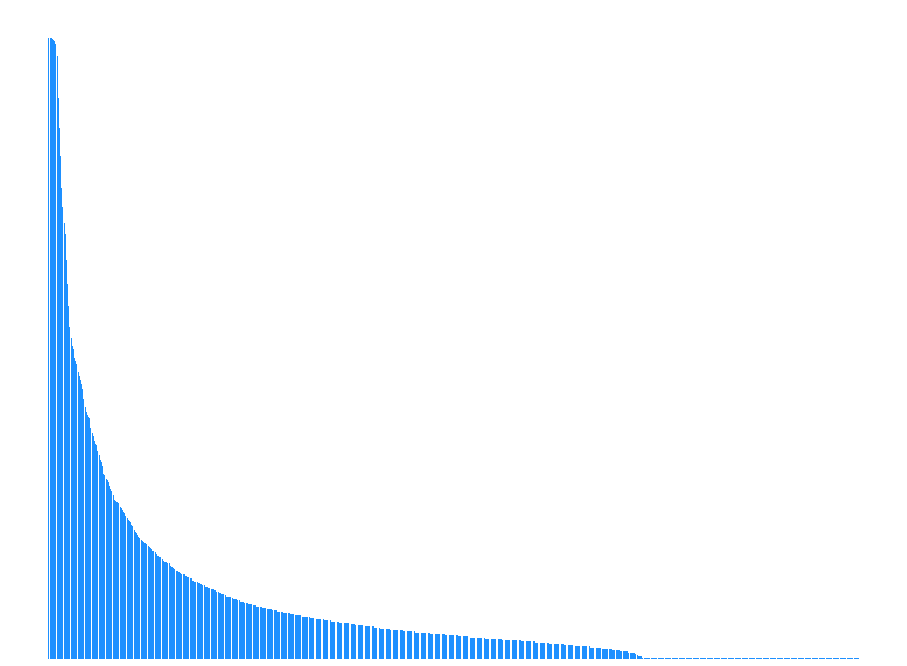

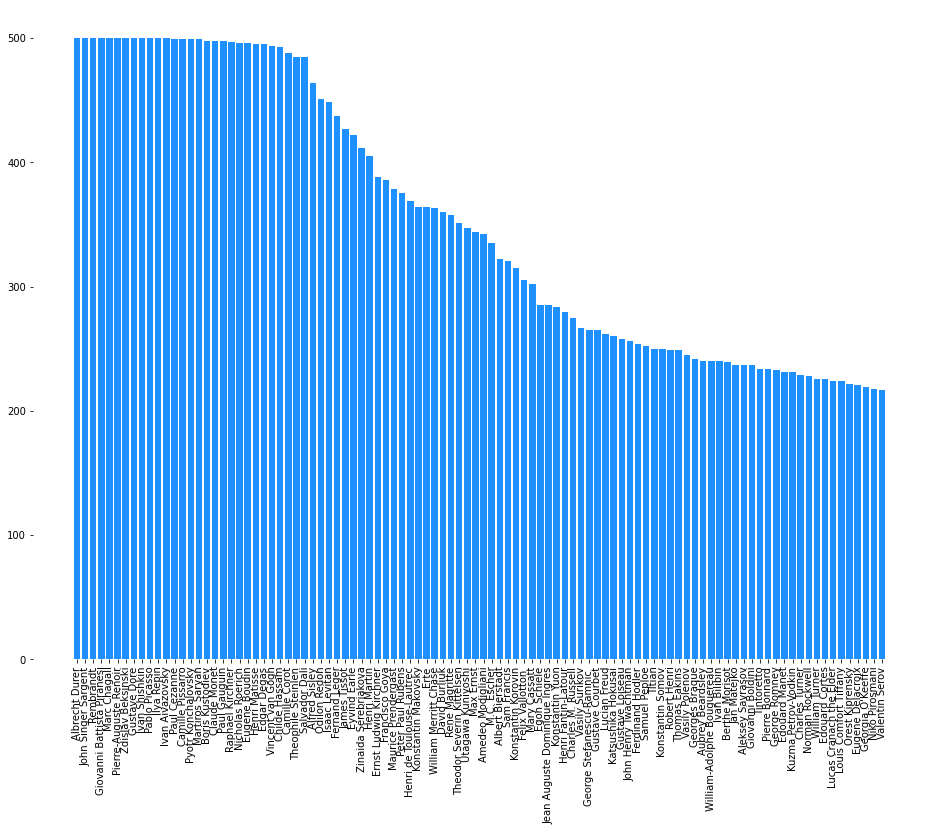

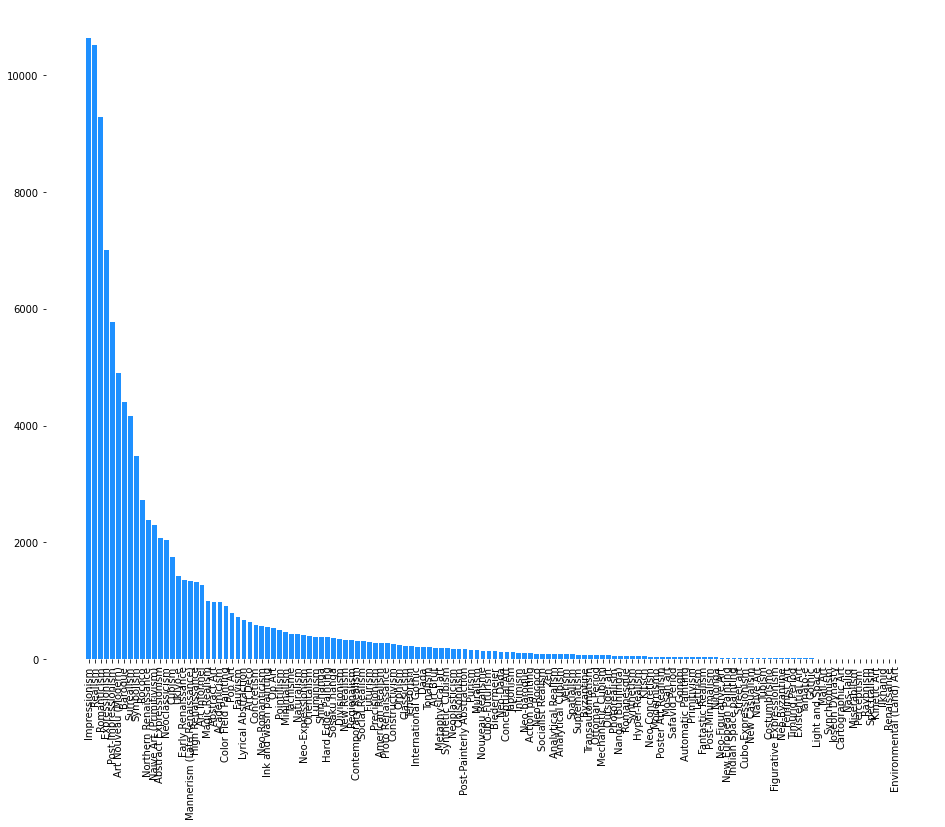

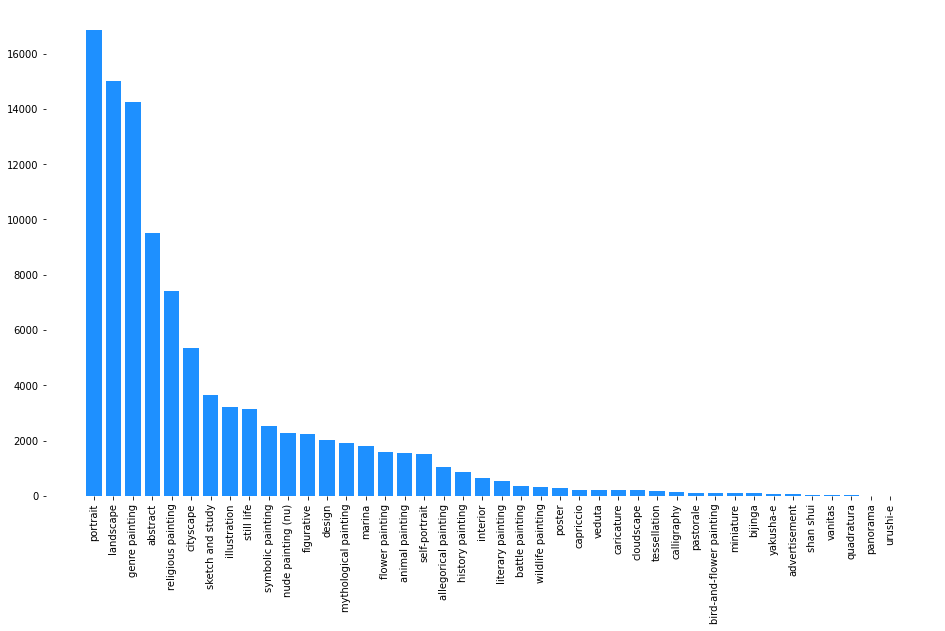

In [6]:
groups = ('artist_group', 'artist', 'artist', 'style', 'genre')
sizes = ((6, 4), (16, 12), (16, 12), (16, 12), (16, 9))
axes = (True, False, True, True, True)
subsets = (None, None, 100, None, None)

for ix, (group, size, axis, samples) in enumerate(zip(groups, sizes, axes, subsets)):
    plt.figure(figsize=size, frameon=False)
    ax = plt.subplot(111)
    labels, counts = np.unique(pbn[group].dropna(), return_counts=True)
    
    p = np.argsort(-counts)[:samples]
    labels, counts = labels[p], counts[p]
    
    plt.bar(labels, counts, color='dodgerblue')
    if not axis: plt.axis('off')

    [ax.spines[s].set_visible(False) for s in ('top', 'right', 'bottom', 'left')]
    plt.xticks(labels, labels, rotation=90)


## Date Histogram

In [7]:
years = pd.to_numeric(pbn.date, errors='coerce').dropna()
years.describe()

count    68080.000000
mean      1875.873002
std        118.249931
min        187.000000
25%       1873.000000
50%       1908.000000
75%       1939.000000
max       2013.000000
Name: date, dtype: float64

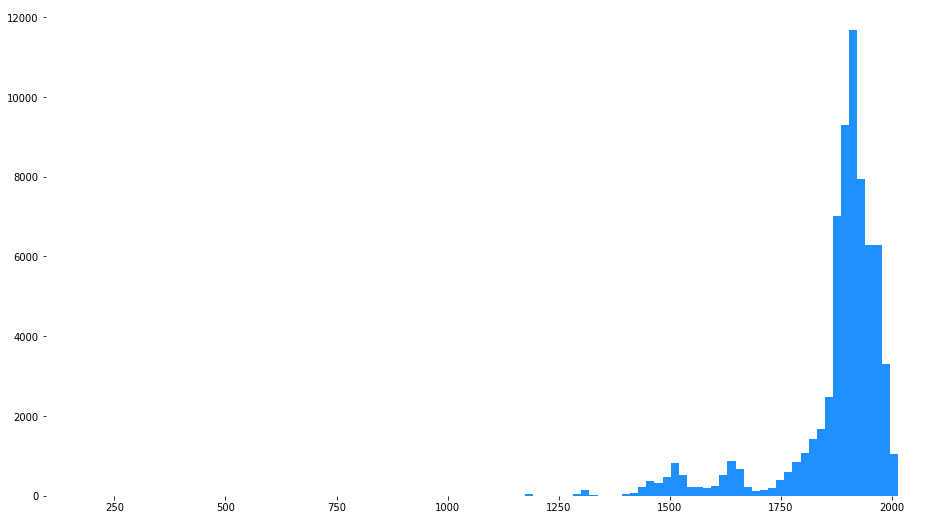

In [8]:
plt.figure(figsize=(16, 9))
plt.hist(years, bins=100, color='dodgerblue')
ax = plt.gca()
_ = [ax.spines[s].set_visible(False) for s in ('top', 'right', 'bottom', 'left')]

## Counting Paintings for The First 100 Painters

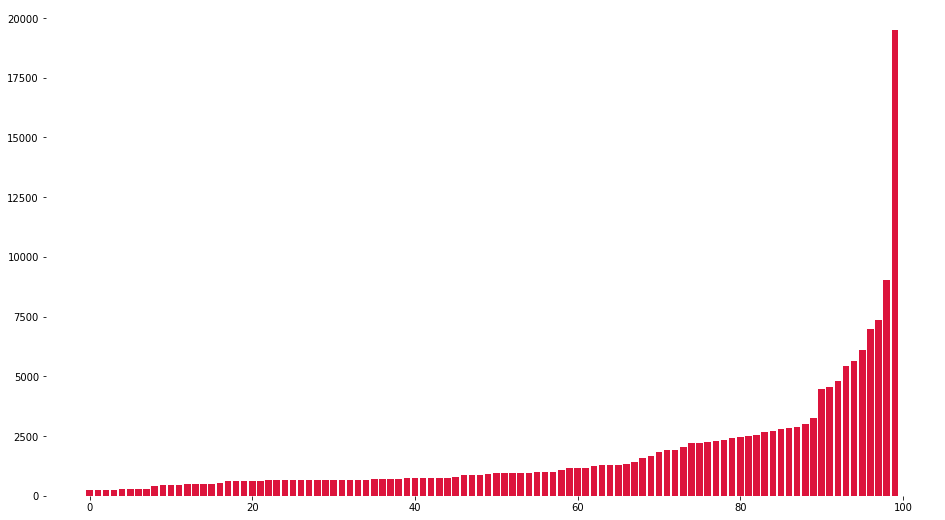

In [9]:
occurrences = {0: 250, 1: 2900, 2: 1100, 3: 300, 4: 2050, 5: 2350, 6: 500, 7: 650,
              8: 750, 9: 2400, 10: 600, 11: 650, 12: 1000, 13: 7350, 14: 700, 15: 700,
              16: 500, 17: 900, 18: 2850, 19: 2300, 20: 4450, 21: 2500, 22: 650, 23: 800,
              24: 850, 25: 600, 26: 4550, 27: 850, 28: 1400, 29: 750, 30: 9050, 31: 1600,
              32: 2200, 33: 1850, 34: 650, 35: 750, 36: 5450, 37: 1350, 38: 6100,
              39: 2650, 40: 450, 41: 1900, 42: 3000, 43: 250, 44: 450, 45: 700, 46: 650,
              47: 950, 48: 750, 49: 1300, 50: 650, 51: 4800, 52: 300, 53: 300, 54: 1250,
              55: 950, 56: 1300, 57: 3250, 58: 850, 59: 600, 60: 1000, 61: 550, 62: 650,
              63: 600, 64: 500, 65: 400, 66: 950, 67: 500, 68: 650, 69: 2800, 70: 250,
              71: 1000, 72: 700, 73: 750, 74: 2250, 75: 650, 76: 1900, 77: 1150, 78: 1650,
              79: 650, 80: 250, 81: 450, 82: 300, 83: 1300, 84: 650, 85: 2200, 86: 5650,
              87: 950, 88: 650, 89: 19500, 90: 950, 91: 7000, 92: 1150, 93: 600, 94: 1150,
              95: 650, 96: 2700, 97: 750, 98: 2450, 99: 2550}

plt.figure(figsize=(16, 9))
plt.bar(range(len(occurrences)), sorted(occurrences.values()), color='crimson')
ax = plt.gca()
_ = [ax.spines[s].set_visible(False) for s in ('top', 'right', 'bottom', 'left')]

In [10]:
s = pd.Series(list(occurrences.values()))
print(s.describe())

count      100.000000
mean      1759.000000
std       2438.375639
min        250.000000
25%        650.000000
50%        925.000000
75%       2200.000000
max      19500.000000
dtype: float64
